# [ 라이브러리 & 함수 정리 ]

In [1]:
# 일단 얘부터 입력 후 시작

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

---

# [ 파일 불러오기 (csv, txt) ]

In [ ]:
# Data Load
import pandas as pd

# csv
df = pd.read_csv("경로", encoding="옵션")

# txt 
# 파일 경로 설정
file_path = "파일 경로 및 파일명.txt"

# 파일 불러오기
df = pd.read_csv(file_path, 
                 delimiter='\t')  # 구분자

# 데이터 확인
print(df)

# [ EDA & 시각화 ]

In [ ]:
df.info()
df.describe()
df.isnull().sum()            # 칼럼별 결측치 확인
df.shape                     # 데이터 행,열 확인

df.value_counts()            # 전체 데이터프레임의 각 열의 고유값들의 개수
df["칼럼"].value_counts()    # 칼럼 내 데이터 값 개수

In [ ]:
## 연속형 칼럼만 선택
# 데이터프레임에서 연속형 변수만 선택하는 코드
con_cols = train.select_dtypes(include=['float64', 'int64'])

## 범주형 칼럼만 선택
cat_cols = df.select_dtypes(include=['object']).columns

## subplot & 크기 조절

In [ ]:
fig, ax = plt.subplot(1, 2, figsize=(12,4))

## 연속형(수치형) 변수 - 히스토그램

In [ ]:
df.hist(bins=15, color='darkblue', figsize=(18,14), grid=False)
plt.show()

- 이진 데이터 중 한 쪽 분포만 많은 컬럼, 즉 쏠린 분포의 데이터는 제거/처리

In [ ]:
# histplot

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(df_F_M['Freq'])
plt.subplot(122)
sns.histplot(data=df_F_M['M'])

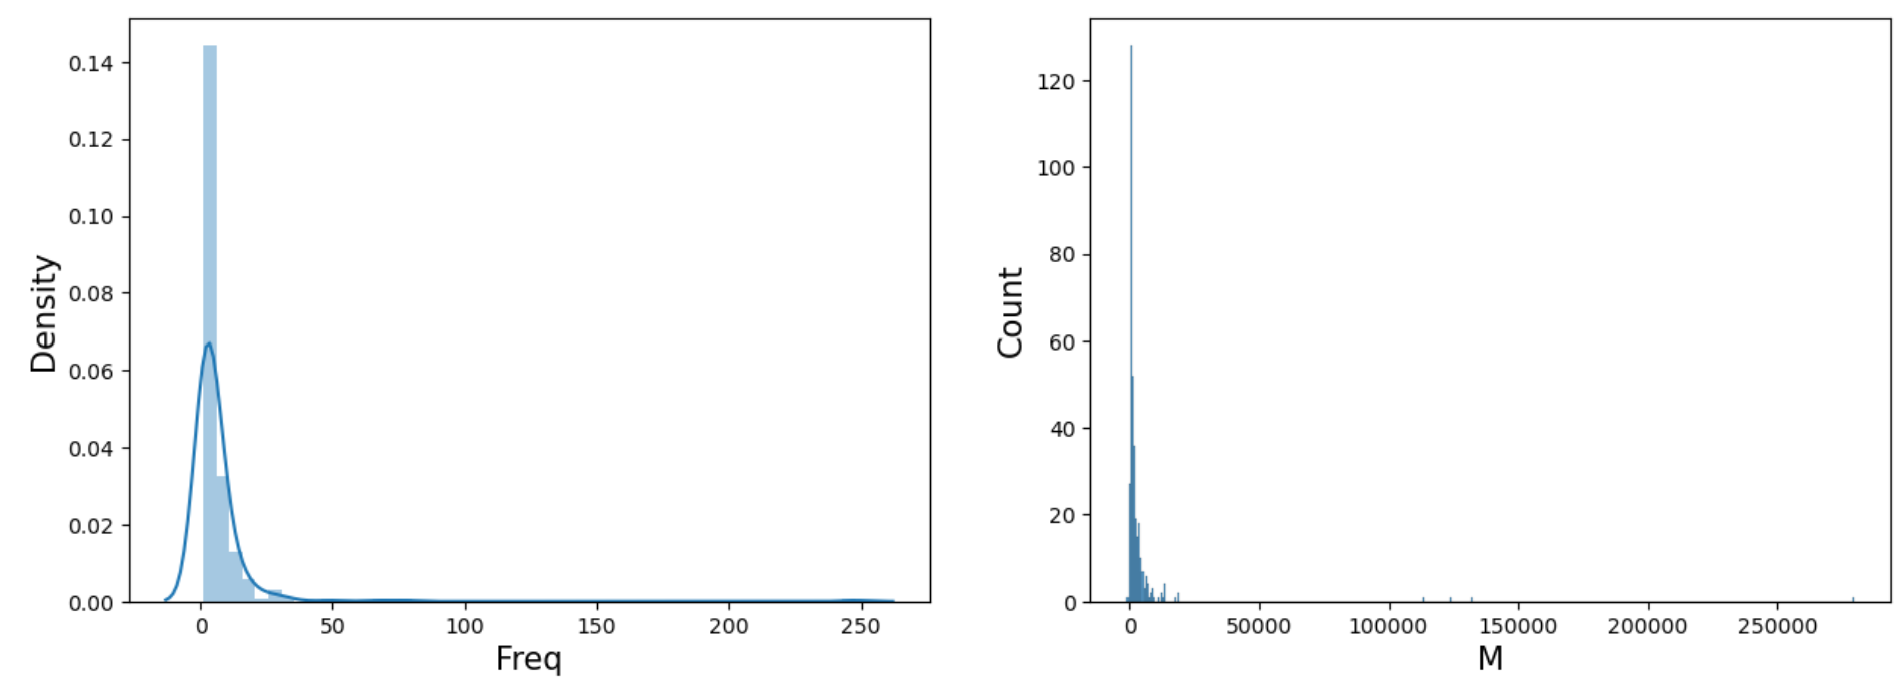

- 왼쪽이 distplot, 오른쪽이 histplot

## 연속형 변수 - distplot

In [ ]:
plt.figure(figsize=(20, 3))

plt.subplot(121)
sns.distplot(data1['Amount'].values, kde=True, color = 'r')
plt.title('Dist. of Transaction Amount')

plt.subplot(122)
sns.distplot(data1['Time'].values, kde=True, color = 'b')
plt.title('Dist. of Transaction Time')

## 범주형 변수 - barplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 프레임에서 범주형 변수 선택
categorical_vars = df.select_dtypes(include=['object']).columns

# 범주형 변수에 대한 barplot 그리기
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(12, 3))

for i, var in enumerate(categorical_vars):
    ax = axes[i]
    df[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # 라벨들의 각도 조절

plt.tight_layout()
plt.show()

## 이상치 파악 - boxplot

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x="col", y="value", data=data_only_X)
plt.xticks(range(8), X.columns) # 그래프의 x축 눈금 표시, columns를 눈금 레이블로 지정
plt.show()

## 상관관계 시각화 (1) 히트맵

In [ ]:
# 상관관계 시각화 : 히트맵
plt.figure(figsize=(5, 5))

# corr matrix 생성
corr_matrix = df.drop(['종속변수'], axis=1).corr().abs() # .abs() 붙으면 절댓값 기준

# 상삼각행렬 반환
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

# 상삼각행렬을 마스킹하여 하삼각행렬만 시각화
# fmt=.0%는 퍼센트, 2f는 소수점 둘째자리까지로 표시될 값의 형식을 지정
# cmap은 색상 조정
sns.heatmap(corr_matrix, 
            mask=up_mask, 
            annot=True,      # 각 셀에 상관계수 표시
            fmt='.2f', 
            square=True, 
            cmap='RdBu_r')

## 상관관계 시각화 (2) pairplot

In [ ]:
# pairplot 
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [ ]:
# EDA
import numpy as np
from scipy.stats import skew, kurtosis  # 왜도, 첨도
import math


# 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# subplot & 크기 조절
fig, ax = plt.subplot(1, 2, figsize=(12,4))

```python
# 일시적으로 그래프 크기 설정
plt.rc('font', size=)          

plt.rc('axes', titlesize=)  or  ax.set_title('title', fontsize=12)
plt.rc('axes', labelsize=)  or  ax.set_xlabel('xlabel', fontsize=12)  or  ax.set_ylabel('ylabel', color='b', fontsize=10)

plt.rc('xtick', labelsize=)  or  ax.tick_params(axis='x', labelcolor='b')
plt.rc('ytick', labelsize=)  or  ax.tick_params(axis='y', labelcolor='b')

plt.rc('legend', fontsize=)    
plt.rc('figure', titlesize=)
----------------------------------------------------------------------------
# 폰트 라이브러리 임포트 
import matplotlib.font_manager as fm

# 그래프 기본 글꼴을 한글글꼴로 변경
plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
-----------------------------------------------------------------------------
# 그래프 "기본" 크기 설정
plt.rcParams['font.size'] = 11.0
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
```

# [ 데이터 전처리 ]

## 결측치 처리 

- 결측값을 평균으로 대체 시 이상치의 영향을 받아 데이터가 왜곡될 수 있으므로 median으로 대체하는 방법을 고려한다.

## 연속형 변수 스케일링

- 스케일링

다른 변수들과 큰 차이가 없으려면 RoubustScaler가 제일 적절해 보임 (StandardScaler로 가능함)

|순서|종류|설명|
|-|---------------|------------------------|
|1|StandardScaler|기본 스케일. 평균과 표준편차 사용|
|2|MinMaxScaler|최대/최소값이 각각 1, 0이 되도록 스케일링|
|3|MaxAbsScaler|최대절대값과 0이 각각 1, 0이 되도록 스케일링|
|4|RobustScaler|중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화|

In [ ]:
# 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler

## 범주형 변수 인코딩 

In [ ]:
df = pd.get_dummies(df)

# [ 데이터 분할 ]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, 
                                                    y,                                                     
                                                    random_state=23,
                                                    test_size=0.2)

# [ 오버샘플링 ]
- 데이터 분할 후에 **train 데이터에만** 샘플링 진행
- 오버샘플링은 훈련 데이터셋에만 적용되며, 테스트 데이터셋은 오버샘플링이 적용되지 않은 원본 데이터셋을 유지

In [ ]:
# pip install imbalanced-learn (sampling)

### 랜덤오버샘플링
from imblearn.over_sampling import RandomOverSampler

X_ROS, y_ROS = RandomOverSampler(random_state=2023).fit_resample(X_train, y_train)
print('After Random Over Sampling')
print(y_ROS.value_counts())

In [ ]:
### SMOTE
from imblearn.over_sampling import SMOTE

# KNN 숫자 지정때문에 시험에서 애먹었다는 후기 있었음. 옵션 알고가자
# SMOTE(random_state=2023,
#       k_neighbors=3) 
X_SMO, y_SMO = SMOTE(random_state=2023).fit_resample(X_train, y_train)
print('After SMOTE')
print(y_SMO.value_counts())

# [ 언더샘플링 ]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# [ 교차 검증 ]
- 훈련세트를 폴드라 불리는 K개의 서브셋으로 무작위 분할
- 모델을 K번 훈련하고 평가하는데, 매번 다른 폴드를 선택해 평가에 사용하고 나머지 K-1개 폴드는 훈련에 사용
- K개의 평가 점수가 담긴 배열 출력

# [ 차원축소 ]
## 중요 : 차원축소 전에 스케일링 !!!
- 주성분 분석(PCA)이나 클러스터링과 같은 알고리즘을 사용하여 변수들을 시각화할 때, 스케일링을 진행하면 결과가 더욱 해석 가능하고 안정적
- PCA를 수행하기 전, 변수 간 스케일의 차이가 주성분 선정에 영향을 주는 것을 방지하기 위해 스케일링 진행
- 스케일링 하지 않으면, 값이 큰 feature가 더 중요한 feature로 판단될 수 있음)

In [ ]:
from sklearn.decomposition import PCA

# [ 모델 평가 지표 ]

In [ ]:
# 모델 평가
from sklearn.metrics import accuracy_score, confusion_matrix, 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, r2_score

# AUC 값 계산법 2가지
from sklearn.metrics import auc, roc_auc_score         

# ROC-AUC 그래프 그리는 방법 2가지
from sklearn.metrics import roc_curve, RocCurveDisplay 

# [ 모델링 - 분류 ]

In [ ]:
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 
import sklearn.svm as svm   # 서포트 벡터 머신 

# 나이브 베이즈
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.ensemble import RandomForestClassifier   # 랜덤포레스트
from xgboost import XGBClassifier     # Xgboost
from lightgbm import LGBMClassifier     # LGBM

from sklearn.neural_network import MLPClassifier     # 인공신경망

## 앙상블

In [ ]:
# 보팅
from sklearn.ensemble import VotingClassifier

# 소프트 보팅
soft_voting = VotingClassifier(voting='soft', # hard -> 하드 보팅
                               estimators=[('rf', rf),
                                           ('mlp', mlp),
                                           ('lgbm', lgbm)])
soft_voting.fit(X_SMO, y_SMO)
print("Soft Voting model f1-score:",
      np.round(f1_score(y_test,
                        soft_voting.predict(X_test),
                        average='macro'), 3))

---

# [ 모델링 - 회귀 ]

In [ ]:
## 회귀분석
from sklearn.linear_model import LogisticRegression,Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# [ 군집 ]

In [ ]:
# 군집
from sklearn.cluster import KMeans

# 군집 평가
from sklearn.metrics import silhouette_score   # 실루엣 계수


# # 군집분석 K갯수 정하는 시각화 - 실루엣 계수 시각화
# from yellowbrick.cluster import SilhouetteVisualizer  

## 이상탐지
from sklearn.ensemble import IsolationForest

# [ 시계열 ]
- 시계열 나오면 그냥 다 입력하자

In [ ]:
## 시계열
from scipy import interpolate  # 결측치 - 보간법

# AR, MA, ARMA, ARIMA, SARIMA 여기서 나옴
import statsmodels.api as sm                        

from statsmodels.tsa.arima.model import ARIMA              # ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX     # SARIMA
from statsmodels.tsa.stattools import acf, pacf

import pmdarima as pm
from pmdarima.arima import auto_arima                      # Auto ARIMA

### 시계열 시각화
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf   

# 정상성 판단 검정
from statsmodels.tsa.stattools import adfuller                       
from statsmodels.tsa.stattools import kpss                     
import itertools

---

# [ 통계검정 ]

In [ ]:
# 통계 검정
from scipy import stats

# 회귀
import statsmodels.formula.api as smf     # formula 이용
import statsmodels.api as sm     # y, X 형태 이용

---

## [ 코드 공간 넓게 ]

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))